# Explore here

In [39]:
import regex as re
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pickle import dump
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, HalvingGridSearchCV
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns

In [3]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')
raw_data

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2995,https://www.youtube.com/watch,True
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


## Explore the Data

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


Note there are no NA values in the data.

In [5]:
raw_data.describe()

,url,is_spam
count,2999,2999
unique,2369,2
top,https://www.bloomberg.com/tosv2.html,False
freq,26,2303


Note there are some duplicated values in the data.

<Axes: xlabel='is_spam', ylabel='count'>

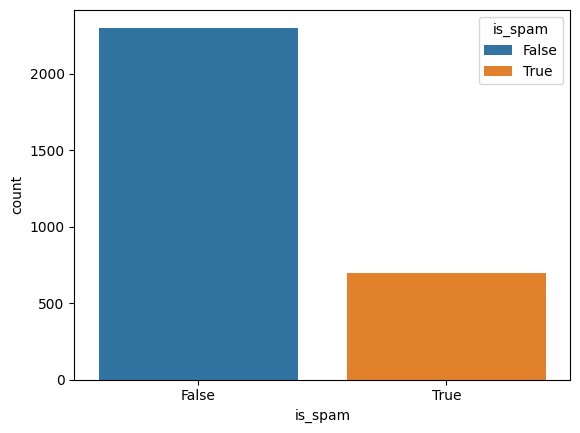

In [6]:
sns.countplot(raw_data, x='is_spam', hue='is_spam')

Note the data is imbalanced


## Investigate Outliers

In [7]:
raw_data['url_length'] = raw_data['url'].str.len()
raw_data

,url,is_spam,url_length
0,https://briefingday.us8.list-manage.com/unsubs...,True,51
1,https://www.hvper.com/,True,22
2,https://briefingday.com/m/v4n3i4f3,True,34
3,https://briefingday.com/n/20200618/m#commentform,False,48
4,https://briefingday.com/fan,True,27
...,...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,False,103
2995,https://www.youtube.com/watch,True,29
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False,66
2997,https://www.technologyreview.com/2019/12/20/13...,False,111


<Axes: xlabel='url_length'>

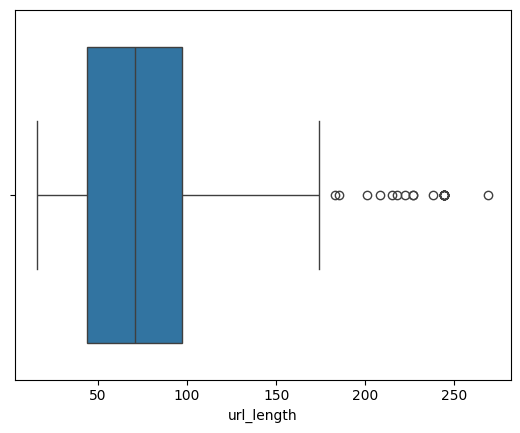

In [8]:
sns.boxplot(raw_data, x='url_length')

<Axes: xlabel='url_length'>

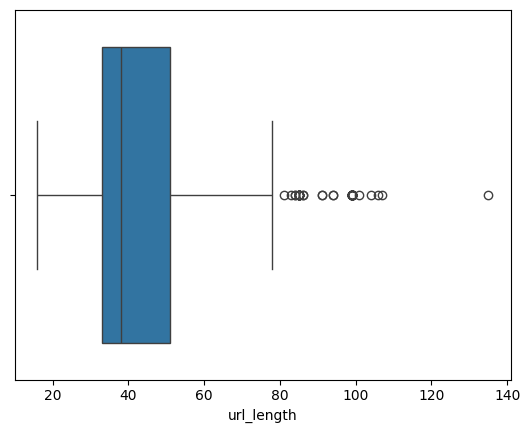

In [9]:
sns.boxplot(raw_data[raw_data['is_spam'] == True], x='url_length')

<Axes: xlabel='url_length'>

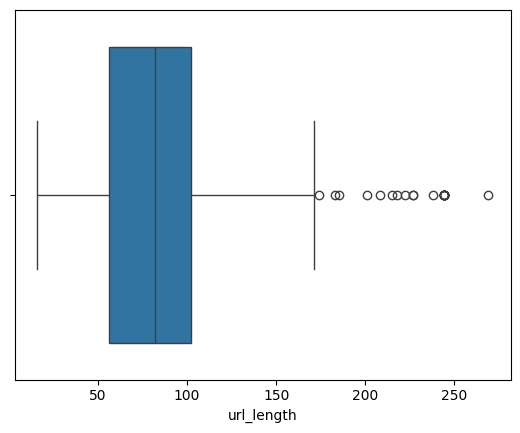

In [10]:
sns.boxplot(raw_data[raw_data['is_spam'] == False], x='url_length')

In [12]:
stats = raw_data['url_length'].describe()
iqr = stats['75%'] - stats['25%']
upper_limit = stats['75%'] + 1.5 * iqr
print(f"Upper limit: {upper_limit}")
up_out = raw_data[raw_data['url_length'] > upper_limit]
pd.set_option('display.max_colwidth', None)
up_out

Upper limit: 176.5


,url,is_spam,url_length
236,https://www.judiciary.senate.gov/press/rep/releases/chairman-graham-statement-on-trump-administrations-intent-to-nominate-jay-clayton-to-be-us-attorney-for-southern-district-of-new-york,False,185
551,https://www.youtube.com/watch?v=4An0ndagZsQ&feature=youtu.be&utm_source=Internet+Brunch&utm_campaign=e37618332a-EMAIL_CAMPAIGN_2019_09_12_01_00_COPY_01&utm_medium=email&utm_term=0_fb5e40aa73-e37618332a-490931862&mc_cid=e37618332a&mc_eid=UNIQID],False,244
560,https://www.youtube.com/watch?v=oieBnV_HFB0&feature=youtu.be&utm_source=Internet+Brunch&utm_campaign=e37618332a-EMAIL_CAMPAIGN_2019_09_12_01_00_COPY_01&utm_medium=email&utm_term=0_fb5e40aa73-e37618332a-490931862&mc_cid=e37618332a&mc_eid=UNIQID],False,244
561,https://www.youtube.com/watch?v=PQmDUEv939A&feature=youtu.be&utm_source=Internet+Brunch&utm_campaign=e37618332a-EMAIL_CAMPAIGN_2019_09_12_01_00_COPY_01&utm_medium=email&utm_term=0_fb5e40aa73-e37618332a-490931862&mc_cid=e37618332a&mc_eid=UNIQID],False,244
562,https://www.youtube.com/watch?v=QrGEIWe0JXY&feature=youtu.be&utm_source=Internet+Brunch&utm_campaign=e37618332a-EMAIL_CAMPAIGN_2019_09_12_01_00_COPY_01&utm_medium=email&utm_term=0_fb5e40aa73-e37618332a-490931862&mc_cid=e37618332a&mc_eid=UNIQID],False,244
701,https://www.youtube.com/watch?v=S0qrinhNnOM&feature=youtu.be&utm_source=Internet+Brunch&utm_campaign=5ecf5bcb57-EMAIL_CAMPAIGN_2019_09_12_01_00_COPY_01&utm_medium=email&utm_term=0_fb5e40aa73-5ecf5bcb57-490931862&mc_cid=5ecf5bcb57&mc_eid=UNIQID],False,244
788,https://www.youtube.com/watch?v=gbCREJh6aCc&feature=youtu.be&utm_source=Internet+Brunch&utm_campaign=a0df6266e9-EMAIL_CAMPAIGN_2019_09_12_01_00_COPY_01&utm_medium=email&utm_term=0_fb5e40aa73-a0df6266e9-490931862&mc_cid=a0df6266e9&mc_eid=UNIQID],False,244
1095,"https://www.npr.org/sections/live-updates-protests-for-racial-justice/2020/06/25/883730816/nasa-names-headquarters-after-mary-jackson-its-first-black-female-engineer#:~:text=NASA%27s%20Washington,%20D.C.,%20headquarters%20will,in%20a%20statement%20released%20Wednesday.",False,269
1518,https://www.youtube.com/watch?v=SrLZgP-OR6s&utm_source=Internet+Brunch&utm_campaign=b5283c0380-EMAIL_CAMPAIGN_2019_09_12_01_00_COPY_01&utm_medium=email&utm_term=0_fb5e40aa73-b5283c0380-490931862&mc_cid=b5283c0380&mc_eid=UNIQID],False,227
1519,https://www.youtube.com/watch?v=N13WI3oVda8&utm_source=Internet+Brunch&utm_campaign=b5283c0380-EMAIL_CAMPAIGN_2019_09_12_01_00_COPY_01&utm_medium=email&utm_term=0_fb5e40aa73-b5283c0380-490931862&mc_cid=b5283c0380&mc_eid=UNIQID],False,227


There does not appear to be any junk urls in the outliers so I will keep all of them.

## Data Preprocessing

In [13]:
# drop the duplicated values
raw_data = raw_data.drop_duplicates()
raw_data = raw_data.reset_index(inplace=False, drop=True)
raw_data.shape

(2369, 3)

In [14]:
# covert the is_spam column to integer values
raw_data['is_spam'] = raw_data['is_spam'].apply(lambda x: 1 if x == True else 0).astype(int)
raw_data.head()

,url,is_spam,url_length
0,https://briefingday.us8.list-manage.com/unsubscribe,1,51
1,https://www.hvper.com/,1,22
2,https://briefingday.com/m/v4n3i4f3,1,34
3,https://briefingday.com/n/20200618/m#commentform,0,48
4,https://briefingday.com/fan,1,27


In [15]:
def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())

    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()


raw_data['url'] = raw_data['url'].apply(preprocess_text)
raw_data.head()

,url,is_spam,url_length
0,"[https, briefingday, us, list, manage, com, unsubscribe]",1,51
1,"[https, www, hvper, com]",1,22
2,"[https, briefingday, com, v, i]",1,34
3,"[https, briefingday, com, m, commentform]",0,48
4,"[https, briefingday, com, fan]",1,27


In [16]:
download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

raw_data['url'] = raw_data['url'].apply(lemmatize_text)
raw_data.head()

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,url,is_spam,url_length
0,"[http, briefingday, list, manage, unsubscribe]",1,51
1,"[http, hvper]",1,22
2,"[http, briefingday]",1,34
3,"[http, briefingday, commentform]",0,48
4,"[http, briefingday]",1,27


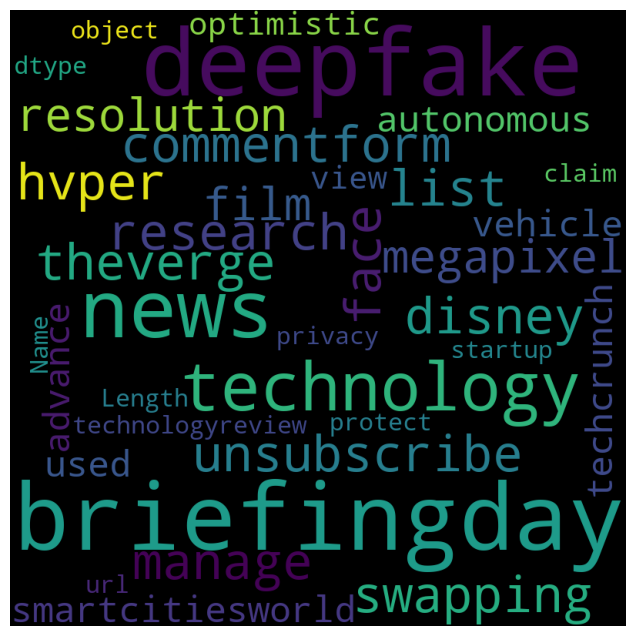

In [17]:
wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(raw_data["url"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [18]:
tokens_list = raw_data["url"]
tokens_list = [" ".join(tokens) for tokens in tokens_list]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = raw_data["is_spam"]

X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5, 538))

## Create and Train the Model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
model = SVC(random_state = 42)
scores = cross_val_score(model, X_train, y_train, scoring= 'accuracy', cv=5)
scores

array([0.93403694, 0.9182058 , 0.9182058 , 0.9182058 , 0.92612137])

## Tune the Model

In [64]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [1, 2, 3, 4, 5],
    "gamma": ["scale", "auto"]
}

# We initialize the random search
grid = HalvingGridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5, n_jobs=-1)
grid

HalvingGridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
                    param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                                'degree': [1, 2, 3, 4, 5],
                                'gamma': ['scale', 'auto'],
                                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                    scoring='accuracy')

In [65]:
tune_param = True

if tune_param:
    import warnings
    warnings.filterwarnings('ignore')

    grid.fit(X_train, y_train)
    print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 100, 'degree': 4, 'gamma': 'auto', 'kernel': 'rbf'}


In [72]:
tuned_model = SVC(C=100, degree=4, random_state = 42)
scores = cross_val_score(tuned_model, X_train, y_train, scoring= 'accuracy', cv=5)
scores

array([0.93931398, 0.92348285, 0.9182058 , 0.92348285, 0.92612137])

In [73]:
tuned_model.fit(X_train, y_train)

SVC(C=100, degree=4, random_state=42)

In [74]:
y_pred = tuned_model.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)

0.9578059071729957

In [78]:
dump(model, open("svm_classifier_linear_42.sav", "wb"))